In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#using synthetic minority oversampling technique [SMOTE()] to perform oversampling on data to address class imbalance 
#this is done to increase the representation of the minority class by generating synthetic samples

def dataprocessing(file):
    data = pd.read_csv(file)

    #It separates the features (attributes) and the target variable (targets) from the DataFrame
    targets = data['Threat']    #targets are the independent variables you wanna predict
    attributes = data.drop('Threat', axis=1)    #attributes is the indepedent variable
    #this means attributes is everything in the dataset except for the threats column

    #using smote() to address the class imbalance by oversampling the minority class

    smote = SMOTE() #creating instance of smote
    attributes, targets = smote.fit_resample(attributes, targets)
    #using fit_resample method to return modified attributes,targets having synthetic samples and balance the class distribution

    #  splitting data into training and testing sets using train_test_split from scikit-learn 
    train_attributes, test_attributes, train_targets, test_targets \
        = train_test_split(attributes, targets)

    return train_attributes, test_attributes, train_targets, test_targets
    #returning the training and testing attributes of features and labels

In [3]:
#to instintiate a decision tree classifier from scikit-learn
#Trains the classifier using the training data (features and labels)
def modeltraining(train_attributes, train_targets):

    #creating instance of DecisionTreeclassifier from scikit learn
    classify = DecisionTreeClassifier()

    classify.fit(train_attributes, train_targets)
    #training the features and labels using fit method

    return classify     
    #returing trained decision tree classifier

In [4]:
# function to visualize the trained Decision Tree
#using plot tree fn from sklearn
def visualize_tree(classifier, feature_names):
    plt.figure(figsize=(12, 8))
    plot_tree(classifier, filled=True, feature_names=feature_names, class_names=['Not Threat', 'Threat'])
    plt.show()

In [5]:
#Using the trained classifier to predict labels for the test data.
#generating a classification report using the classification_report function from scikit-learn
#comparing the predicted labels against the actual labels
def modeltesting(test_attributes, test_targets, classify):

    #using the trained classifier for making predictions for testing features

    predictions = classify.predict(test_attributes) #using trained decision tree classifier to make predictions on the testing data
    report = classification_report(test_targets, predictions)
    #generating classification report from skicit learn
    #it includes precision , score, f1 score, suport

    return report 
    #returning the classification report

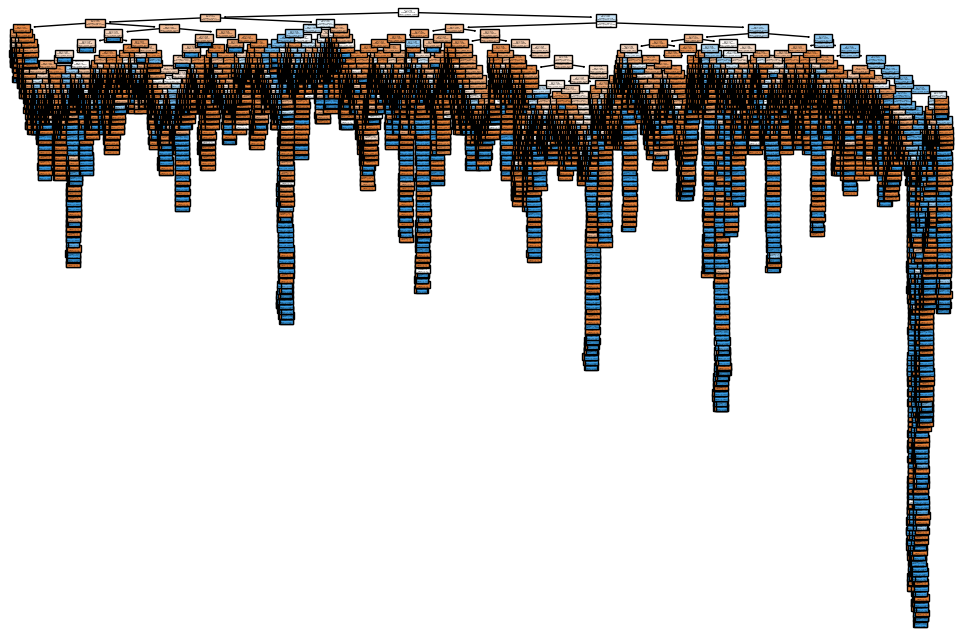

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    249460
           1       0.99      1.00      0.99    249586

    accuracy                           0.99    499046
   macro avg       0.99      0.99      0.99    499046
weighted avg       0.99      0.99      0.99    499046



In [6]:
if __name__ == "__main__":
    train_x, test_x, train_y, test_y = dataprocessing("/Users/rohanshenoy/Downloads/threats.csv")
    #calling dataprocessing fn to get training and testing data


    #training the classifier based on training data  
    classification_model = modeltraining(train_x, train_y)

    # Visualize the Decision Tree
    visualize_tree(classification_model, list(train_x.columns))

    #Tests the trained classifier using the preprocessed test data and prints classification report
    rep = modeltesting(test_x, test_y, classification_model)
    #prints the classification report
    print(rep)